In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
norms = pd.read_csv('../../data/psychNorms/psychNorms.zip', index_col=0, compression='zip', low_memory=False)
norm_metadata = pd.read_csv('../../data/psychNorms/psychNorms_metadata.csv', index_col='norm')
norm_metadata['associated_embed'] = norm_metadata['associated_embed'].astype(str)
norms

,Freq_HAL,Freq_KF,Freq_SUBTLEXUS,Freq_SUBTLEXUK,Freq_Blog,Freq_Twitter,Freq_News,Freq_CobW,Freq_CobS,CD_SUBTLEXUS,...,reproduction_vanarsdall,person_vanarsdall,goals_vanarsdall,movement_vanarsdall,concreteness_vanarsdall,familiarity_vanarsdall,imageability_vanarsdall,familiarity_fear,aoa_fear,imageability_fear
'em,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.3617,1.9138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'neath,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
're,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9031,1.6335,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'shun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'tis,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4771,0.6021,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shrick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.62,4.38,2.93
post office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.79,3.07,5.29
fishing rod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.29,3.38,5.64
March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.43,2.76,3.50


In [3]:
# Identifying count-based norms to investigate which need log transformation
numeric_norms = norm_metadata.query('type == "numeric"').index
count_norms = [norm for norm in numeric_norms if norms[norm].dropna().apply(float.is_integer).all()]
norm_metadata.loc[count_norms]

,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,
Nsenses_WordNet,Number of senses based on the WordNet database.,"Miller, G. A. (1995). ""WordNet: a lexical data...",semantic_diversity,nan,numeric,40480
Nsenses_Wordsmyth,Number of senses based on the Wordsmyth dictio...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,nan,numeric,534
Nmeanings_Wordsmyth,Number of meanings based on the Wordsmyth dict...,"Rice, C. A., et al. (2019). ""A comparison of h...",semantic_diversity,nan,numeric,534
Nmeanings_Websters,Number of meanings based on the Websters dicti...,"Gao, C., Shinkareva, S. V., & Desai, R. H. ""SC...",semantic_diversity,nan,numeric,40945
NFeatures,Number of features listed for the word. This m...,"Buchanan, E. M., et al. (2019). ""English seman...",number_of_features,nan,numeric,4381
Sem_N,The number of semantic neighbors within a thre...,"Shaoul, C. and C. Westbury (2006). ""Word frequ...",semantic_neighborhood,nan,numeric,52008
Assoc_Freq_Token123,The number of times that a word is one of the ...,"De Deyne, S., et al. (2019). ""The “Small World...",semantic_neighborhood,PPMI_SVD_SWOW SGSoftMaxInput_SWOW SGSoftMaxOut...,numeric,29722
Cue_SetSize,The number of different responses or targets g...,"Nelson, D. L., et al. (2004). ""The University ...",semantic_neighborhood,nan,numeric,4954
likableness_anderson,Likableness ratings on a scale from 0 (least f...,"@article{anderson1968likableness,\n title={Li...",social/moral,nan,numeric,555


In [4]:
# Dropping norms that were wrongly identified as count-based using automatic method above
count_norms = [
    'Nsenses_WordNet', 'Nsenses_Wordsmyth', 'Nmeanings_Wordsmyth', 'Nmeanings_Websters', 
    'NFeatures', 'Sem_N', 'Assoc_Freq_Token123', 'Cue_SetSize'
]


rt_norms = [norm for norm in numeric_norms if 'rt_' in norm.lower()]
norm_metadata.loc[rt_norms]

,description,citation,category,associated_embed,type,n_ratings
norm,,,,,,
LexicalD_RT_V_ELP,The mean visual lexical decision latency (in m...,"Balota, D. A., et al. (2007). ""The English lex...",visual_lexical_decision,nan,numeric,40467
LexicalD_RT_V_ECP,The mean visual lexical decision latency (in m...,"Mandera, P., et al. (2019). ""Recognition times...",visual_lexical_decision,nan,numeric,61851
LexicalD_RT_V_BLP,The mean visual lexical decision latency (in m...,"Keuleers, E., et al. (2012). ""The British Lexi...",visual_lexical_decision,nan,numeric,28514
LexicalD_RT_A_MALD,The mean auditory lexical decision latency (in...,"Tucker, B. V., et al. (2019). ""The massive aud...",autidtory_lexical_decision,nan,numeric,26522
LexicalD_RT_A_AELP,The mean auditory lexical decision latency (in...,"Goh, W. D., et al. (2020). ""The Auditory Engli...",autidtory_lexical_decision,nan,numeric,10081
Naming_RT_ELP,The mean naming latency (in msec) for a partic...,"Balota, D. A., et al. (2007). ""The English lex...",naming,nan,numeric,40480
SemanticD_RT_Calgary,The mean latency (in msec) of concrete/abstrac...,"Pexman, P. M., et al. (2017). ""The Calgary sem...",semantic_decision,nan,numeric,9999
Short_Binder,Short ratings on a scale from 0 (Not at all) t...,"Binder, J. R., Conant, L. L., Humphries, C. J....",space/time/quantity,compo_attribs,numeric,534
rt_khanna,Reaction time (milliseconds) for performing th...,"@article{khanna2011age,\n title={Age of acqui...",semantic_decision,nan,numeric,1314


Nsenses_WordNet


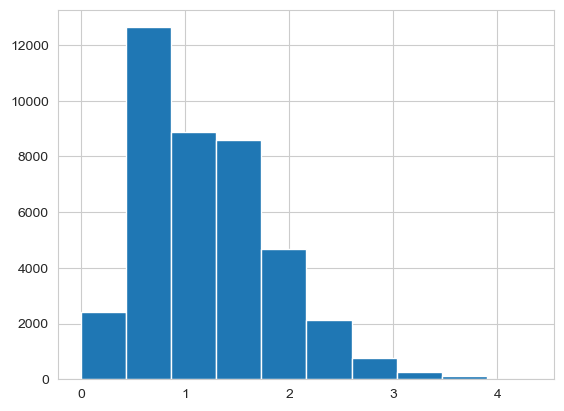

Nsenses_Wordsmyth


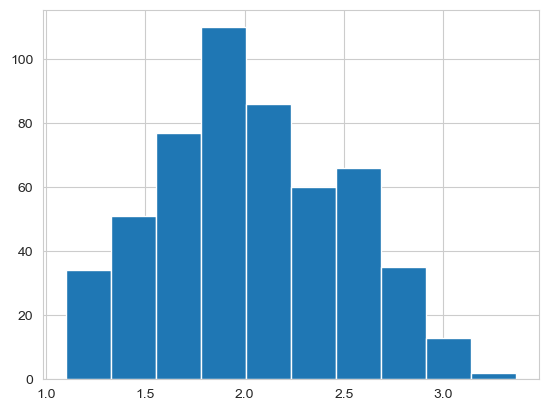

Nmeanings_Wordsmyth


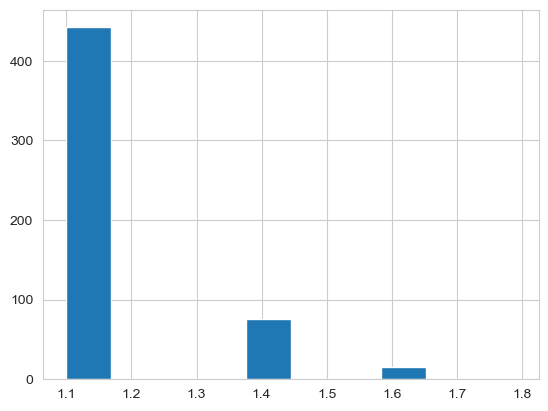

Nmeanings_Websters


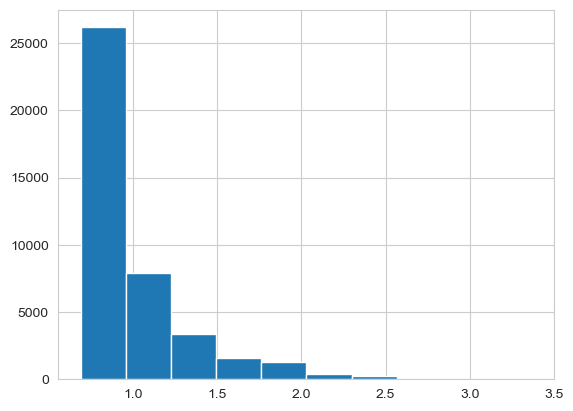

NFeatures


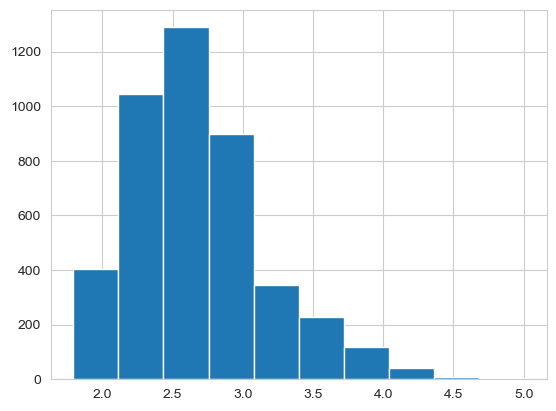

Sem_N


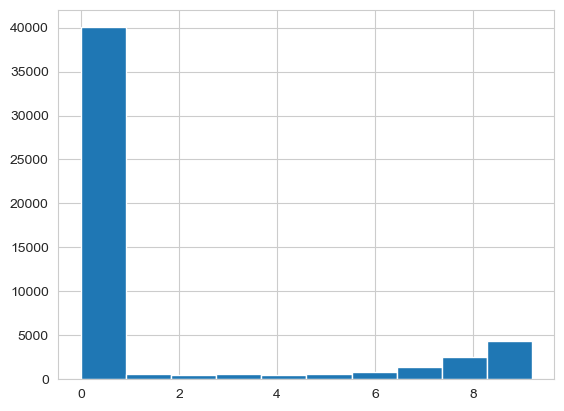

Assoc_Freq_Token123


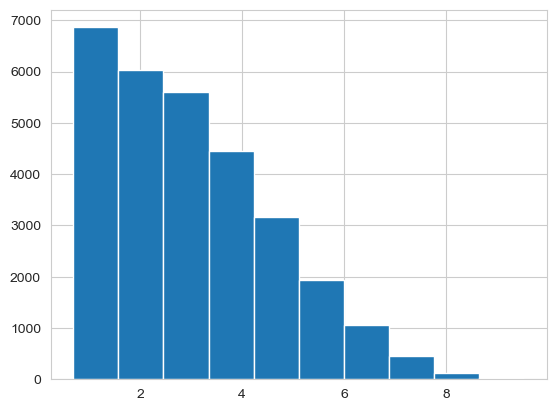

Cue_SetSize


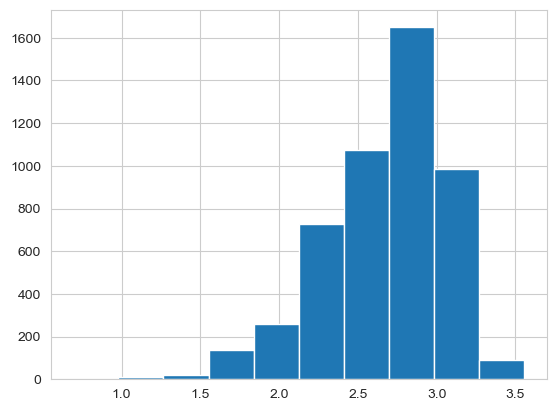

LexicalD_RT_V_ELP


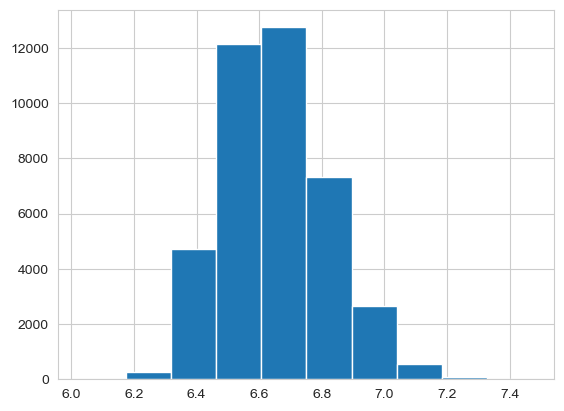

LexicalD_RT_V_ECP


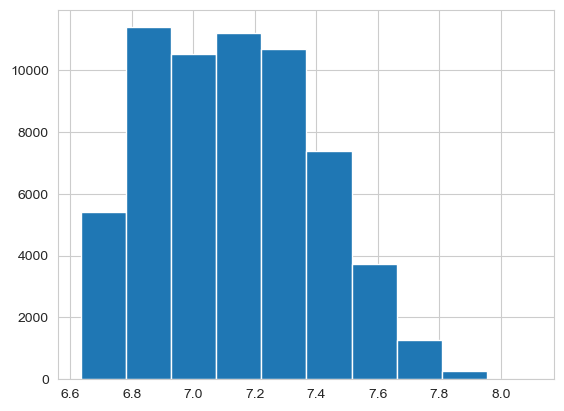

LexicalD_RT_V_BLP


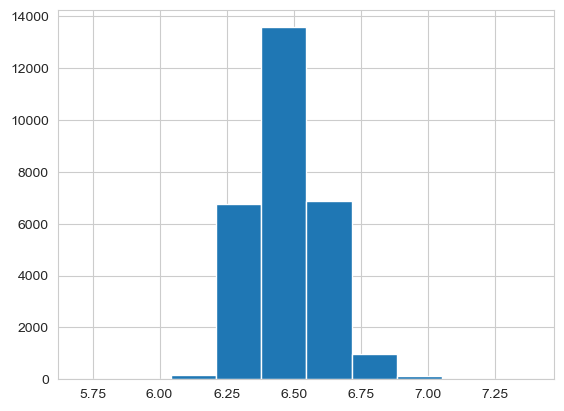

LexicalD_RT_A_MALD


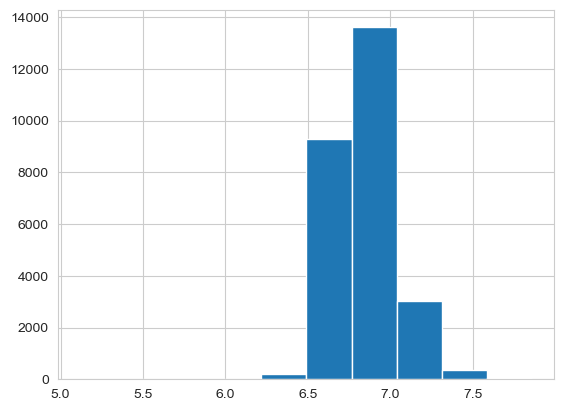

LexicalD_RT_A_AELP


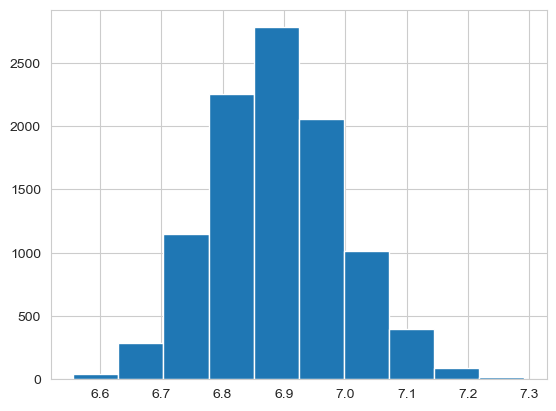

Naming_RT_ELP


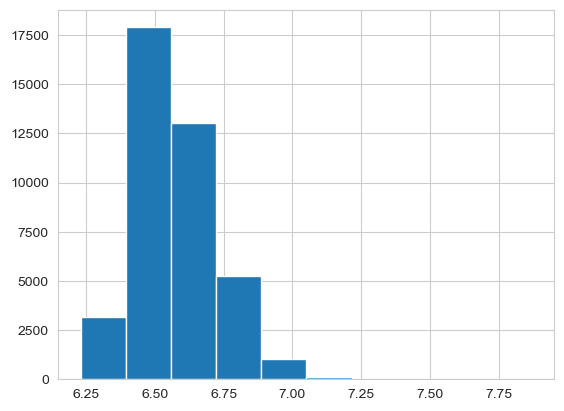

SemanticD_RT_Calgary


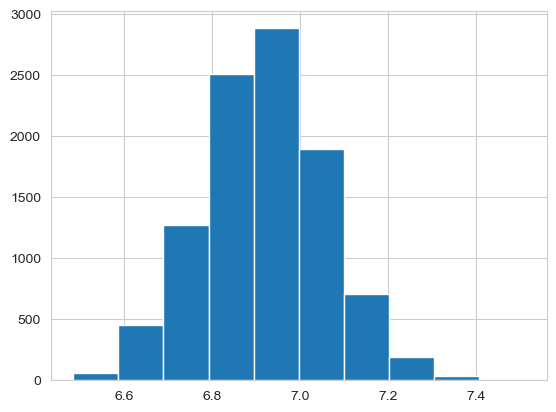

rt_khanna


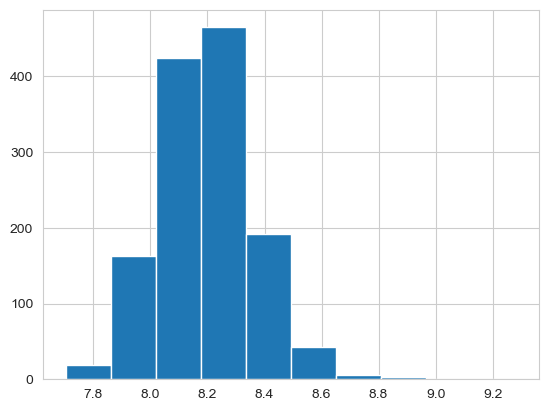

rt_ley


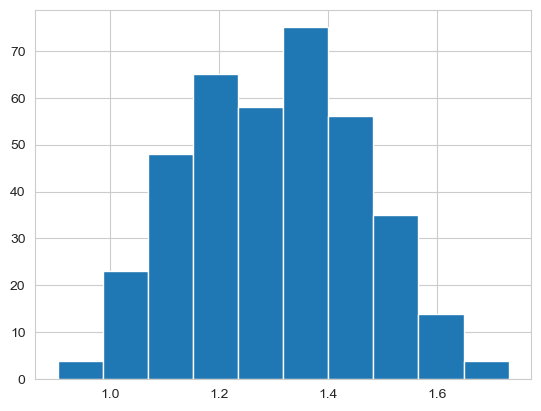

rt_chiarello


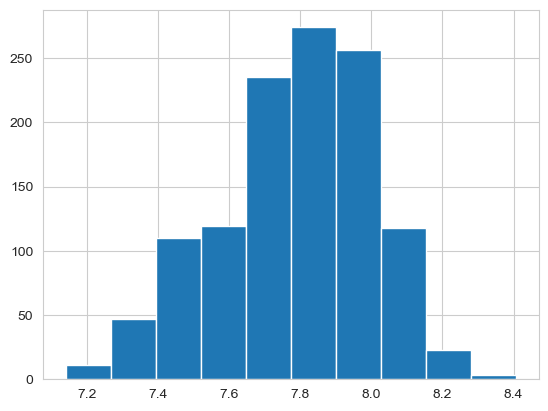

rt_chen


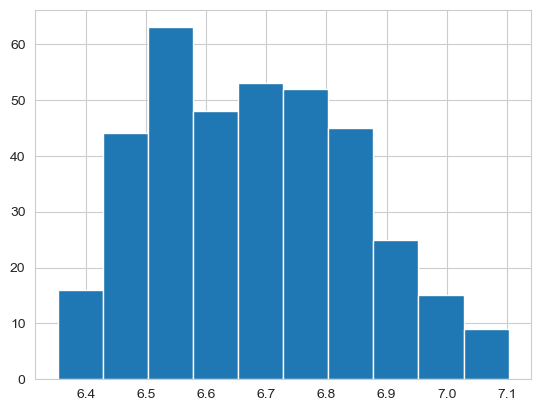

aoa_rt_cortese


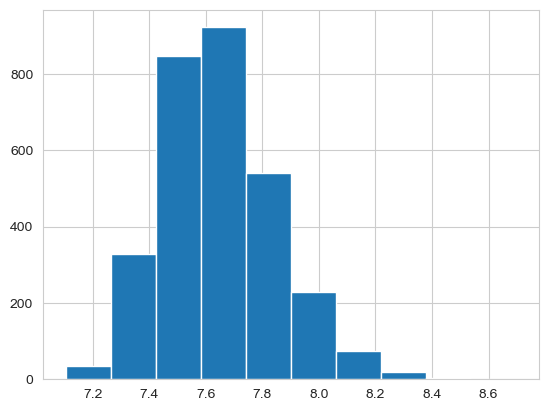

imageability_rt_cortese


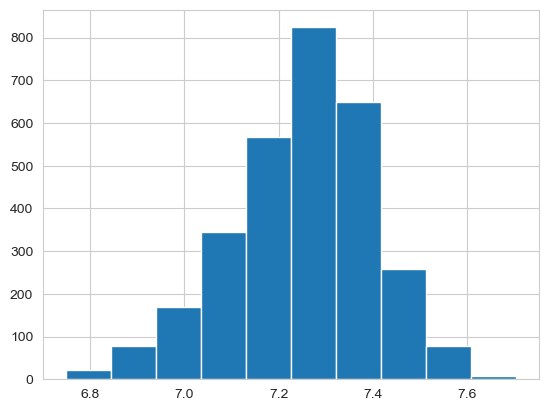

rt_schock


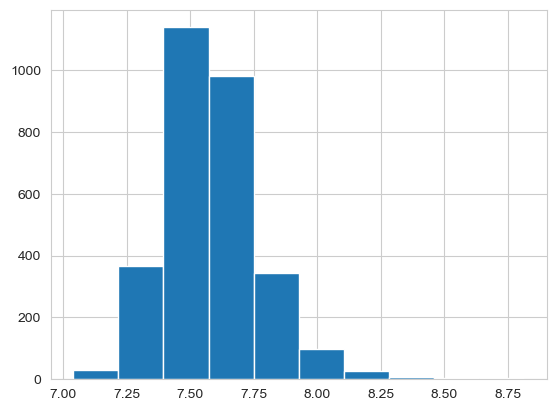

In [5]:
# Dropping norms that were wrongly identified as reaction time-based using automatic method above
rt_norms.remove('Short_Binder')

# Log transforming remaining count norms
to_log = count_norms + rt_norms
norms[to_log] = norms[to_log].apply(np.log1p)

# Checking it roughly worked
for norm in to_log:
    print(norm)
    norms[norm].hist()
    plt.show()

In [7]:
# Saves as
pd.DataFrame(to_log, columns=['norm']).to_csv('../../data/norms_to_log.csv', index=False)